In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [17]:
filename = 'bad2.png'

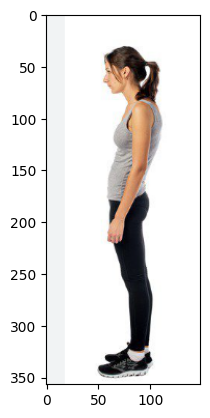

In [19]:
# Load Image cvt to RGB
image= cv2.imread(filename)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
model = YOLO('yolov8l-pose.pt')
results = model(filename,save=False)


image 1/1 /home/nabil/Cognitive_service/Pose_estimation/bad2.png: 640x288 1 person, 524.8ms
Speed: 2.0ms preprocess, 524.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)


In [21]:
res_list = results[0].keypoints.data.tolist()[0]
res_list = [list(map(int,l)) for l in res_list]

In [22]:
body_parts = {
    "Nose": 0,
    "Left Eye": 1,
    "Right Eye": 2,
    "Left Ear": 3,
    "Right Ear": 4,
    "Left Shoulder": 5,
    "Right Shoulder": 6,
    "Left Elbow": 7,
    "Right Elbow": 8,
    "Left Wrist": 9,
    "Right Wrist": 10,
    "Left Hip": 11,
    "Right Hip": 12,
    "Left Knee": 13,
    "Right Knee": 14,
    "Left Ankle": 15,
    "Right Ankle": 16
}

In [23]:
import math
def angle_between_lines(A, B, C, D):
    v1x, v1y = B[0] - A[0], B[1] - A[1]
    v2x, v2y = D[0] - C[0], D[1] - C[1]
    
    
    dot_product = v1x * v2x + v1y * v2y
    magnitude_v1 = math.sqrt(v1x**2 + v1y**2)
    magnitude_v2 = math.sqrt(v2x**2 + v2y**2)
    
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
    
    theta_radians = math.acos(cos_theta)
    theta_degrees = math.degrees(theta_radians)
    
    return theta_degrees

In [24]:
direction = "Left" if res_list[body_parts["Right Shoulder"]][0] > res_list[body_parts["Nose"]][0] else "Right"
print(direction)
A = res_list[body_parts[f"{direction} Hip"]]
B = res_list[body_parts[f"{direction} Shoulder"]]
C = res_list[body_parts[f"{direction} Ear"]]

Left


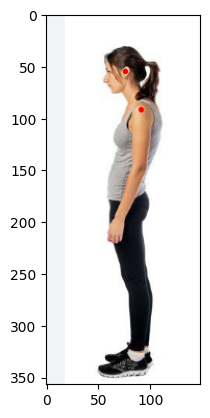

In [25]:
keypoint1 = body_parts[f"{direction} Shoulder"]
point1 = res_list[keypoint1]
keypoint2 = body_parts[f"{direction} Ear"]
point2 = res_list[keypoint2]
image = cv2.circle(image, (point1[0],point1[1]), 1, (255,0,0) , 2) 
image = cv2.circle(image, (point2[0],point2[1]), 1, (255,0,0) , 2) 
plt.imshow(image)

In [26]:
ang = angle_between_lines((0,350),(0,0),B,C)
print(ang)

22.06789956241023


In [27]:
if ang<15:
    print("Goood")
else:
    print("Bad")

Bad
